<a href="https://colab.research.google.com/github/bintangsholu21/Pembelajaran-Mesin/blob/main/Quiz%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kuis 2 Pembelajaran Mesin**


### **Kelompok 6**

* Clarita Putri Anggraeni 				(2141720213)
* Muhammad Bintang Sholu Firmansyah		(2141720101)
* Syahla’ Syafiqah Fayra 				(2141720015)
* Yasmine Navisha Andhani				(2141720047)


---
## **Soal**

**Buat program OCR untuk mengextract text dari data ktp, dengan input foto ktp dan output text**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 1. Download library
!pip install opencv-python
!pip install pytesseract
!pip install matplotlib


In [2]:
# 2. Import Library
import cv2
import pytesseract
import os
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# 3. Path folder
folder_path = '/content/drive/MyDrive/Machine Learning/dataset_KTP/'

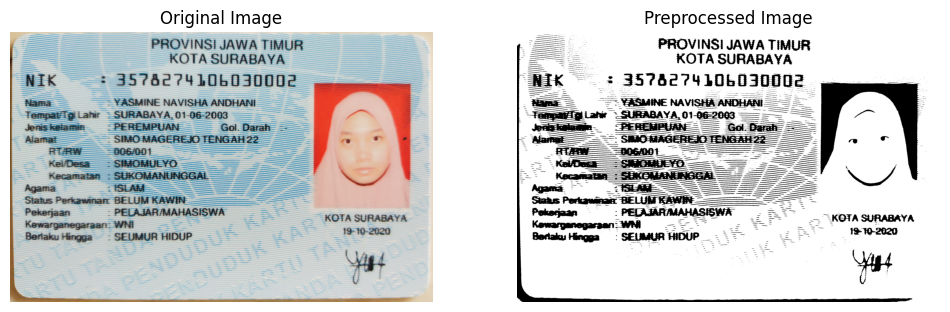

In [6]:

# 3. Path to the image
image_path = '/content/drive/MyDrive/Machine Learning/dataset_KTP/2.jpg'

# 4. Preprocessing image
def preprocess_image(image_path):
    # Load image using OpenCV
    imgPreprocess = cv2.imread(image_path)

    # Grayscale
    gray = cv2.cvtColor(imgPreprocess, cv2.COLOR_BGR2GRAY)

    # Thresholding
    thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    return thresholded

# 5. Display original and preprocessed images
original_image = cv2.imread(image_path)
preprocessed_image = preprocess_image(image_path)

plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
plt.title('Preprocessed Image')
plt.axis('off')

plt.show()


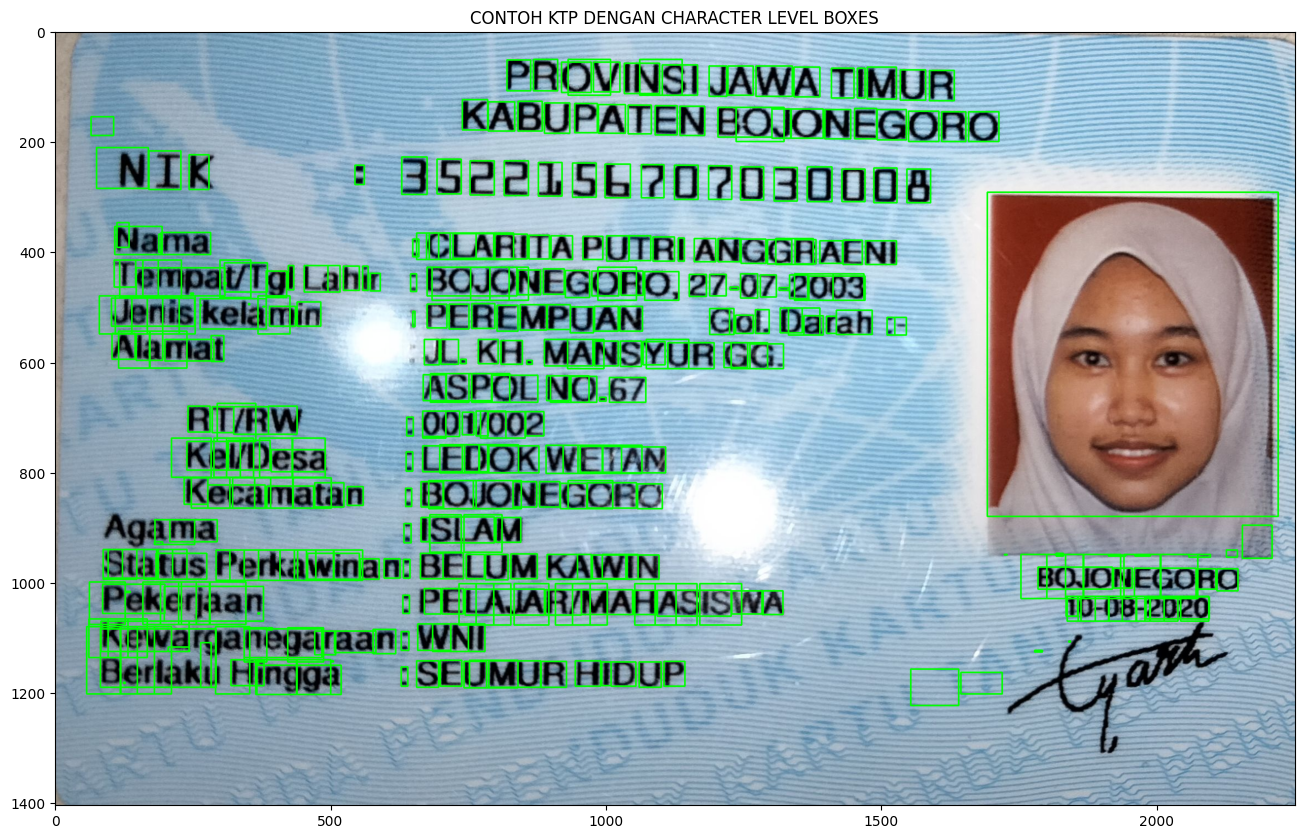

In [8]:
# 5. Bounding box tiap kata pada dokumen

# Membaca gambar dari direktori
image = cv2.imread(folder_path + '3.jpg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH KTP DENGAN CHARACTER LEVEL BOXES')
plt.show()


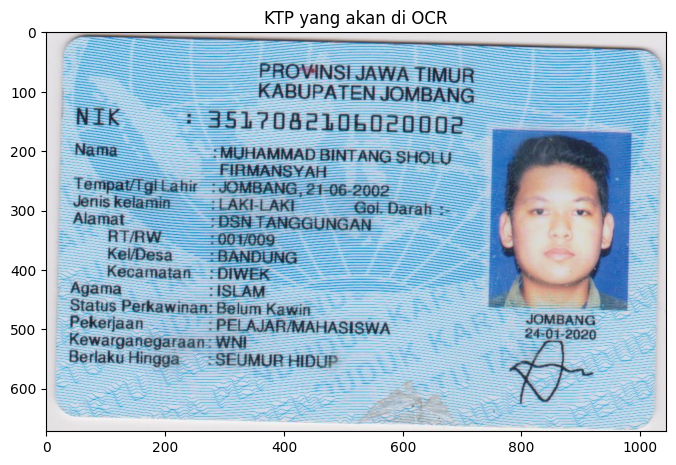

In [12]:
# Membaca gambar asli
image = cv2.imread(folder_path + '1.jpg')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('KTP yang akan di OCR')
plt.show()


" \n\nPROVINSI JAWA TIMUR\n\nKABUPATEN JOMBANG\nNIK : 351?08210k4020002\nNama : MUHAMMAD BINTANG SHOLU\nFIRMANSYAH\nTempat/Tgi Lahir ! JOMBANG, 21-06-2002\nJenis kelamin 2LAKI-L AKI Got Darah :-\nAlamat ' BSN TANGGUNGAN\nRT/RW 1007009\n\nKel/Desa : BANDUNG\nKecamatan: DIWEK\n\n   \n\nAgama LISLAM - 25\nStatus Perkawinan: Belum Kawin JOMBANG\nPekerjaan : PELAJAR/MAHASISWA 24-01-2020\nKewarganegaraan: WNI L£\n\nBerlaku Hingga: SEUMUR HIDUP\n\x0c"

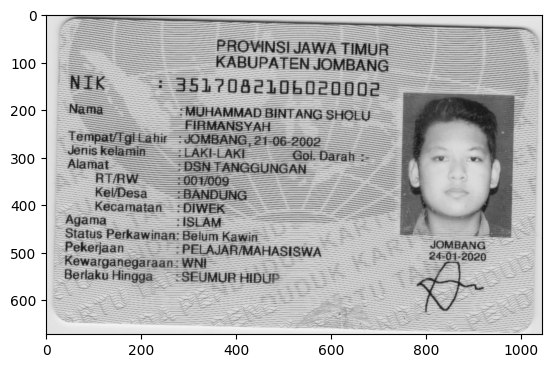

In [16]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')


#melakukan thresholding citra skala abu-abu
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
result = pytesseract.image_to_string((threshed), lang='ind')
result

In [17]:
#iterasi melalui setiap kata dalam teks hasil ekstraksi berdasarkan baris baru
for word in result.split('\n'):
    if "``_" in word:
        word = word.replace("''_", ":")

    #apakah kata tersebut mengandung "NIK"
    if "NIK" in word:
        nik_chars = word.split()
        for i in range(len(nik_chars)):
            if "D" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("D", "0")
            if "?" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("?", "7")

        word = ' '.join(nik_chars)

    print(word)

 

PROVINSI JAWA TIMUR

KABUPATEN JOMBANG
NIK : 351708210k4020002
Nama : MUHAMMAD BINTANG SHOLU
FIRMANSYAH
Tempat/Tgi Lahir ! JOMBANG, 21-06-2002
Jenis kelamin 2LAKI-L AKI Got Darah :-
Alamat ' BSN TANGGUNGAN
RT/RW 1007009

Kel/Desa : BANDUNG
Kecamatan: DIWEK

   

Agama LISLAM - 25
Status Perkawinan: Belum Kawin JOMBANG
Pekerjaan : PELAJAR/MAHASISWA 24-01-2020
Kewarganegaraan: WNI L£

Berlaku Hingga: SEUMUR HIDUP

